In [2]:
import pandas as pd

pizza = {'diameter': [6, 8, 10, 14, 18],
         'n_topping':[2, 1, 0, 2, 0],
         'harga': [7, 9, 13, 17.5, 18]}

train_pizza_df = pd.DataFrame(pizza)
train_pizza_df

,diameter,n_topping,harga
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,0,18.0


In [3]:
pizza = {'diameter': [8, 9, 11, 16, 12],
         'n_topping':[2, 0, 2, 2, 0],
         'harga': [11, 8.5, 15, 18, 11]}

test_pizza_df = pd.DataFrame(pizza)
test_pizza_df

,diameter,n_topping,harga
0,8,2,11.0
1,9,0,8.5
2,11,2,15.0
3,16,2,18.0
4,12,0,11.0


In [4]:
import numpy as np

x_train = np.array(train_pizza_df[['diameter', 'n_topping']])
y_train = np.array(train_pizza_df['harga'])

print(f' x_train : \n{x_train}\n')
print(f'y_train : {y_train}')

 x_train : 
[[ 6  2]
 [ 8  1]
 [10  0]
 [14  2]
 [18  0]]

y_train : [ 7.   9.  13.  17.5 18. ]


In [5]:
x_test = np.array(test_pizza_df[['diameter', 'n_topping']])
y_test = np.array(test_pizza_df['harga'])

print(f' x_test : \n{x_test}\n')
print(f'y_test : {y_test}')

 x_test : 
[[ 8  2]
 [ 9  0]
 [11  2]
 [16  2]
 [12  0]]

y_test : [11.   8.5 15.  18.  11. ]


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('r2: ', r2_score(y_test, y_pred))

r2:  0.7701677731318468


In [8]:
x_train = np.array(train_pizza_df['diameter']).reshape(-1,1)
y_train = np.array(train_pizza_df['harga'])

print(f' x_train : \n{x_train}\n')
print(f'y_train : {y_train}')

 x_train : 
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

y_train : [ 7.   9.  13.  17.5 18. ]


In [13]:
from sklearn.preprocessing import PolynomialFeatures

quadratic_features = PolynomialFeatures(degree=2)
x_train_quadratic = quadratic_features.fit_transform(x_train)

print('X train quadratic : \n', x_train_quadratic)

X train quadratic : 
 [[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]


In [12]:
model = LinearRegression()
model.fit(x_train_quadratic, y_train)

LinearRegression()

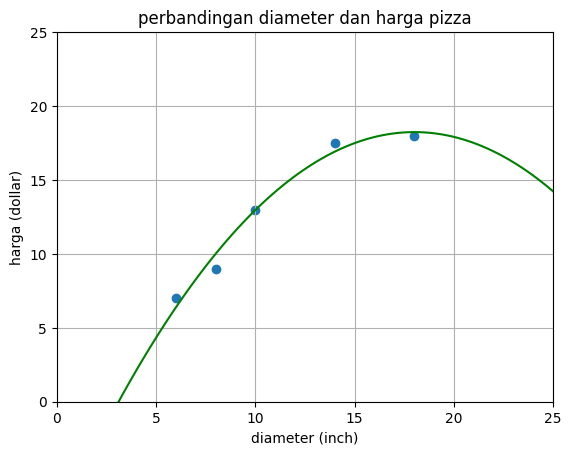

In [21]:
import matplotlib.pyplot as plt

x_vis = np.linspace(0, 25, 100).reshape(-1, 1)
x_vis_quadratic = quadratic_features.transform(x_vis)
y_vis_quadratic = model.predict(x_vis_quadratic)

plt.scatter(x_train, y_train)
plt.plot(x_vis, y_vis_quadratic, '-g')

plt.title('perbandingan diameter dan harga pizza')
plt.xlabel('diameter (inch)')
plt.ylabel('harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()